# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
breastCancer = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/_deprecated_breast_cancer_wisconsin/_deprecated_breast_cancer_wisconsin.tsv.gz", sep='\t')
breastCancer.sample(10)

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
153,0,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.017860,0.1830,...,11.99,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772
448,0,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.029250,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
189,0,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,0.1667,...,13.35,19.59,86.65,546.7,0.1096,0.16500,0.14230,0.04815,0.2482,0.06306
309,0,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
44,1,13.17,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.052520,0.1746,...,16.23,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618
174,0,10.66,15.15,67.49,349.6,0.08792,0.04302,0.000000,0.000000,0.1928,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
32,1,17.02,23.98,112.80,899.3,0.11970,0.14960,0.241700,0.120300,0.2248,...,20.88,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482
105,1,13.11,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,0.1925,...,16.31,22.40,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050
134,1,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,...,22.52,31.39,145.60,1590.0,0.1465,0.22750,0.39650,0.13790,0.3109,0.07610
310,0,11.70,19.11,74.33,418.7,0.08814,0.05253,0.015830,0.011480,0.1936,...,12.61,26.55,80.92,483.1,0.1223,0.10870,0.07915,0.05741,0.3487,0.06958


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# Original column names
breastCancer.columns

Index(['target', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

In [5]:
# Rename columns for readability
breastCancer = breastCancer.rename(columns={
    '2': 'radius_mean', 
    '3': 'texture_mean', 
    '4': 'perimeter_mean', 
    '5': 'area_mean', 
    '6': 'smoothness_mean',
    '7': 'compactness_mean', 
    '8': 'concavity_mean', 
    '9': 'concave_points_mean', 
    '10': 'symmetry_mean', 
    '11': 'fractal_dimension_mean',
    '12': 'radius_SE',
    '13': 'texture_SE',
    '14': 'perimeter_SE',
    '15': 'area_SE',
    '16': 'smoothness_SE',
    '17': 'compactness_SE',
    '18': 'concavity_SE',
    '19': 'concave_points_SE',
    '20': 'symmetry_SE',
    '21': 'fractal_dimension_SE',
    '22': 'radius_worst',
    '23': 'texture_worst',
    '24': 'perimeter_worst',
    '25': 'area_worst',
    '26': 'smoothness_worst',
    '27': 'compactness_worst',
    '28': 'concavity_worst',
    '29': 'concave_points_worst',
    '30': 'symmetry_worst',
    '31': 'fractal_dimension_worst'
})

breastCancer.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE',
       'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Breast Mass Diagnosis Features

**`target`**: Used to diagnose breast masses. The target feature is the **Diagnosis** of the breast mass. (0 = *Benign*, 1 = *Malignant*)

---

### Size Features and Shape Features

**2. `radius_mean`**: The mean radius of the nuclei in the sample, measured from the center to points on the perimeter. 

**4. `perimeter_mean`**: The mean perimeter of the nuclei in the sample.

**5. `area_mean`**: The mean area of the nuclei in the sample.

**12. `radius_SE`**: The standard error of the radius of the nuclei in the sample, measured from the center to points on the perimeter.

**14. `perimeter_SE`**: The standard error of the perimeter of the nuclei in the sample.

**15. `area_SE`**: The standard error of the area of the nuclei in the sample.

**22. `radius_worst`**: The **"worst"** (mean of 3 largest values) radius of the nuclei in the sample, measured from the center to points on the perimeter.

**24. `perimeter_worst`**: The **"worst"** (mean of 3 largest values) perimeter of the nuclei in the sample.

**25. `area_worst`**: The **"worst"** (mean of 3 largest values) area of the nuclei in the sample.

---

## Shape Features

**6. `smoothness_mean`**: The mean local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**7. `compactness_mean`** ($perimeter^2/area - 1.0$): Measures the mean compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**10. `symmetry_mean`**: The mean symmetry of the nuclei shapes in the sample.

**16. `smoothness_SE`**: The standard error local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**17. `compactness_SE`** ($perimeter^2/area - 1.0$): Measures the standard error compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**20. `symmetry_SE`**: The standard error symmetry of the nuclei shapes in the sample.

**26. `smoothness_worst`**: The **"worst"** (mean of 3 largest values) local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**27. `compactness_worst`** ($perimeter^2/area - 1.0$): The **"worst"** (mean of 3 largest values) compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**30. `symmetry_worst`**: The **"worst"** (mean of 3 largest values) symmetry of the nuclei shapes in the sample.

---

### Contour (Edge) Irregularity Features

**8. `concavity_mean`**: The mean severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**9. `concave_points_mean`**: The mean amount of concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**11. `fractal_dimension_mean`**: The mean irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

**18. `concavity_SE`**: The standard error severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**19. `concave_points_SE`**: The standard error concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**21. `fractal_dimension_SE`**: The standard error irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

**28. `concavity_worst`**: The **"worst"** (mean of 3 largest values) severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**29. `concave_points_worst`**: The **"worst"** (mean of 3 largest values) concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**31. `fractal_dimension_worst`**: The **"worst"** (mean of 3 largest values) irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

---

### Texture Feature

**3. `texture_mean`**: is the mean standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

**13. `texture_SE`**: The standard error of the standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

**23. `texture_worst`**: The **"worst"** (mean of 3 largest values) standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

---

#### Measurements

* Mean: $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

* Standard Error: $\frac{\sigma}{\sqrt{n}}$

* Worst: mean of 3 largest values

---

#### Sources

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

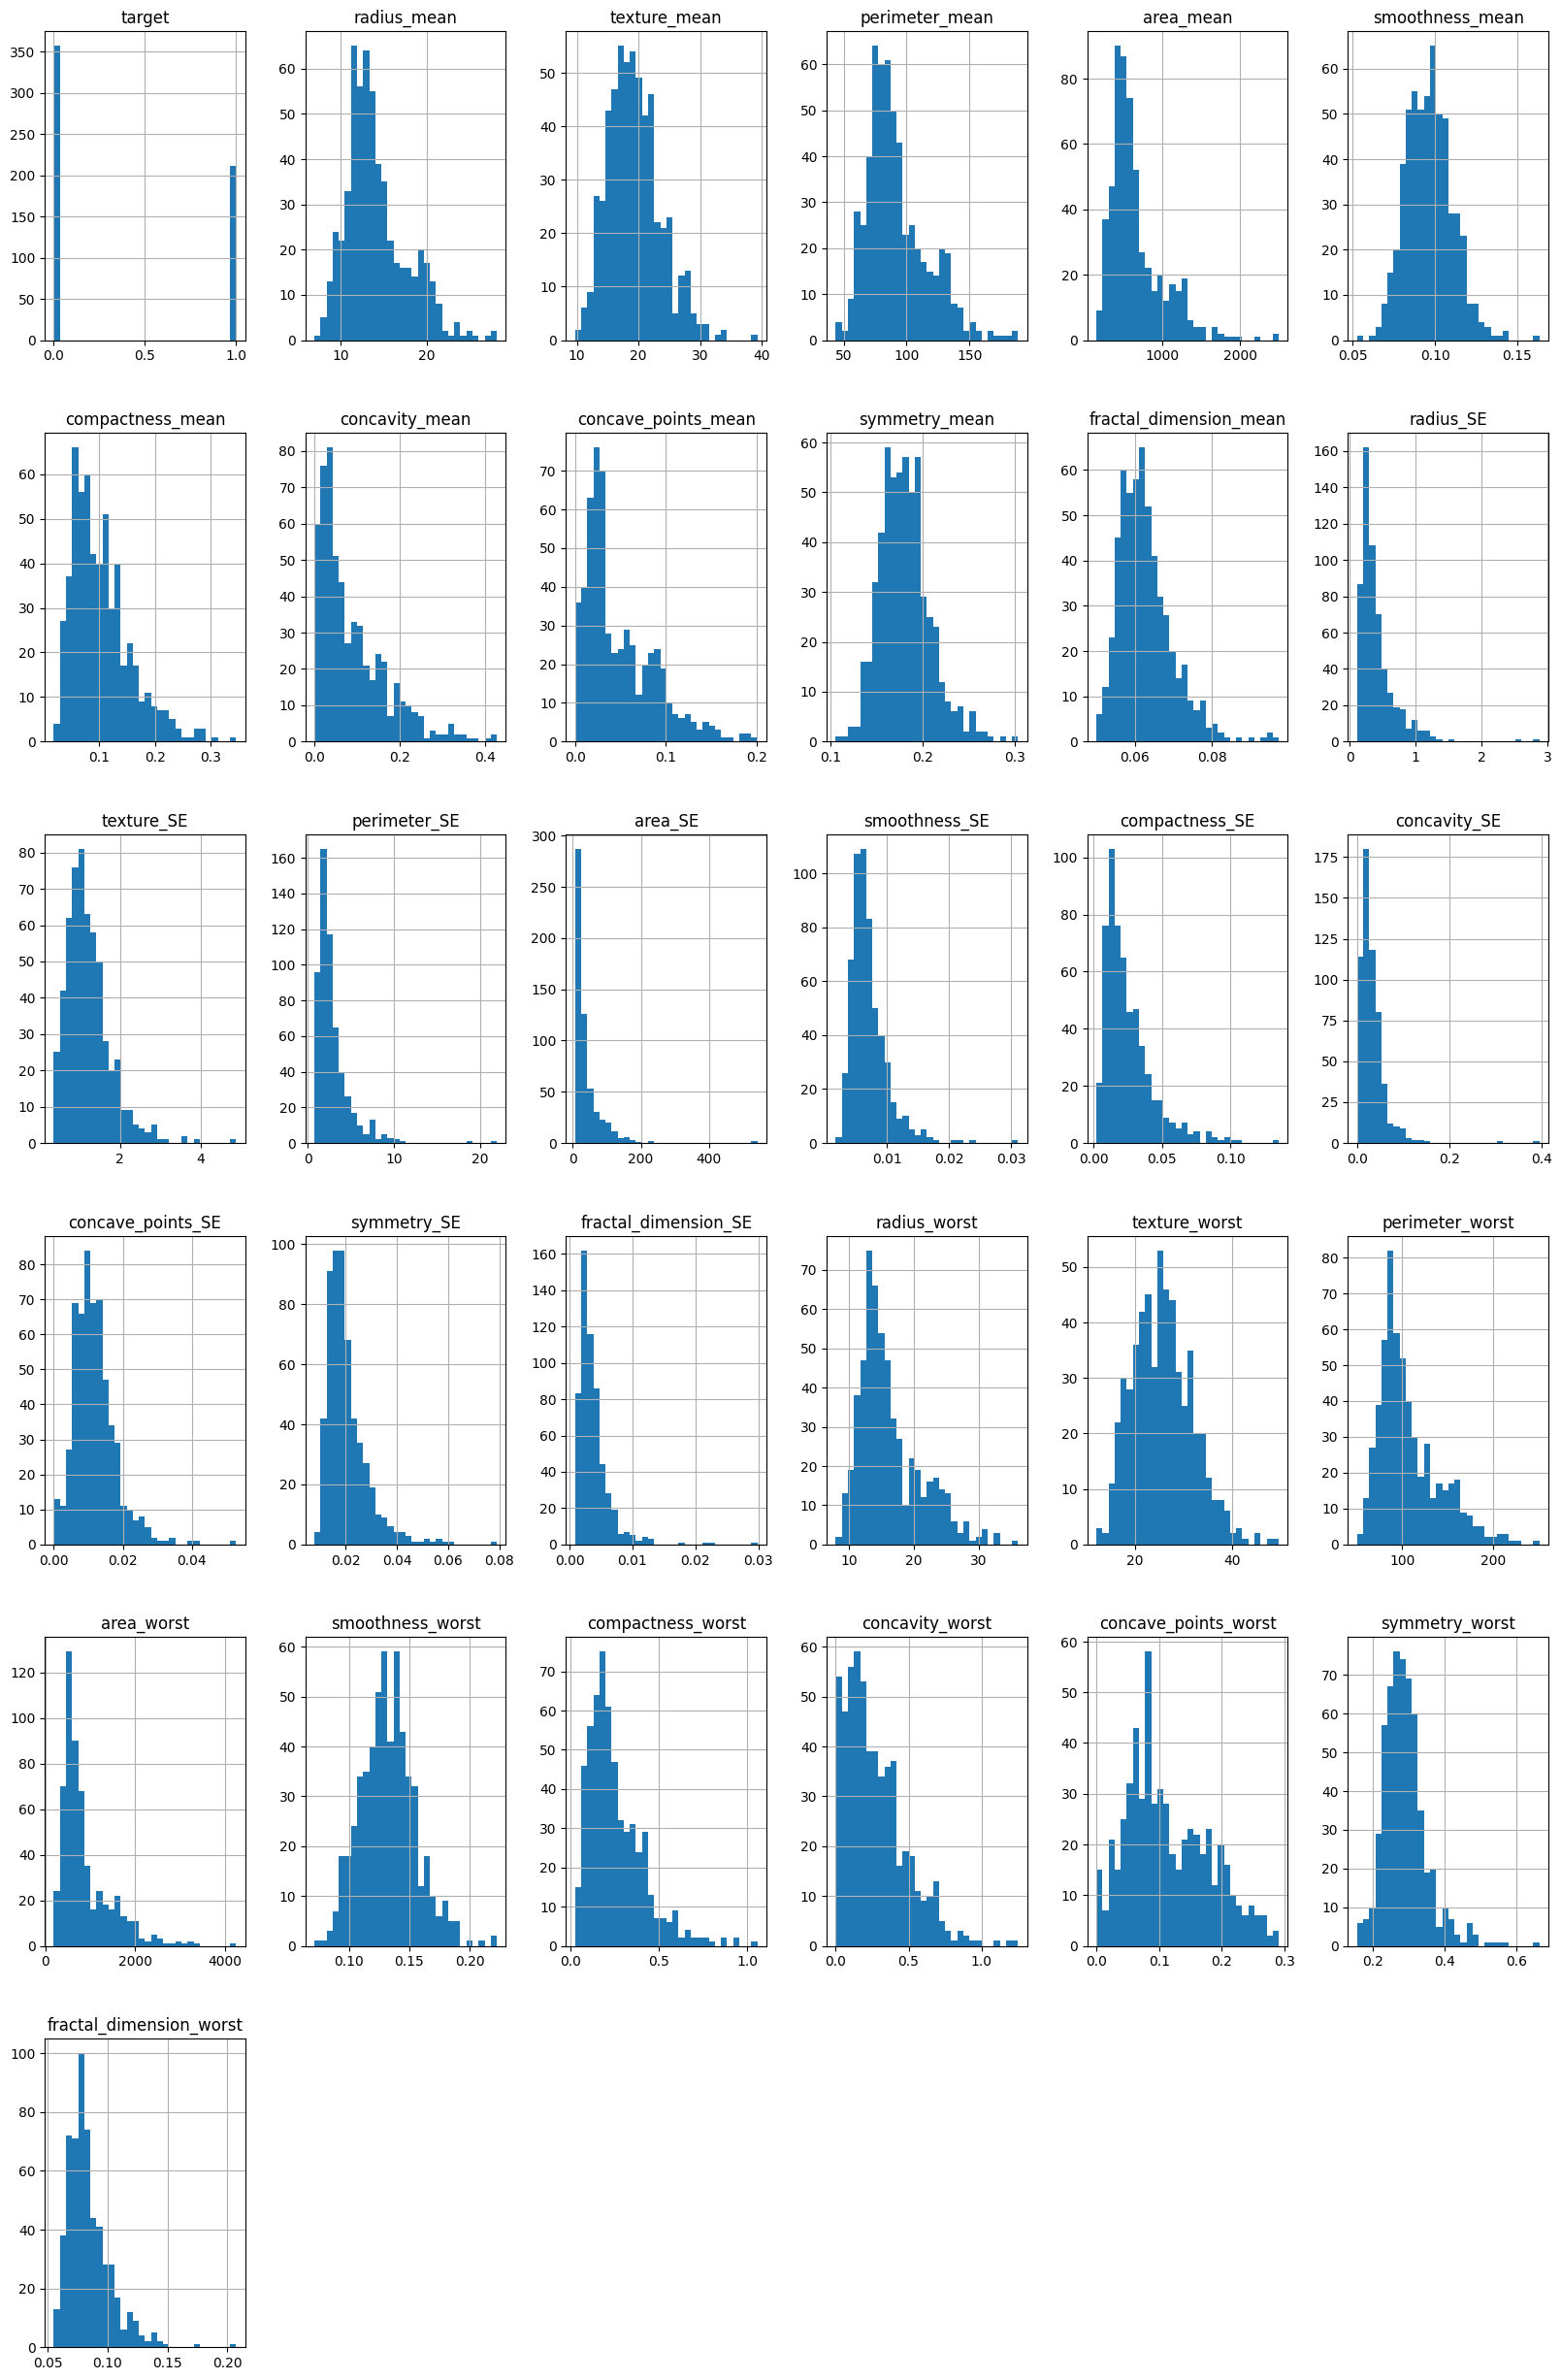

In [6]:
# YOUR CODE HERE
num_cols = len(breastCancer.columns)
breastCancer.hist(bins=30, figsize=(20, num_cols))
None

`target`: Binary distribution with more than 350 benign samples and more than 200 malignant samples

`radius_mean`: Right skewed distribution (majority of samples between 10 and 20)

`texture_mean`: Slightly right skewed distribution (majority of samples are somewhat evely distributed between 15 and 25)

`perimeter_mean`: Right skewed distribution (majority of samples are between 75 and 125)

`area_mean`: Strong right skewed distribution (majority of samples are between 100 and 1000)

`smoothness_mean`: Close to a normal distribution (majority of samples are between 0.075 and 0.125)

`compactness_mean`: Strong right skewed distribution (majority of samples are between 0 and 0.15)

`concavity_mean`: Very strong right skewed distribution (majority of samples are between 0 and 0.2)

`concave_points_mean`: Strong right skewed distribution (majority of samples are between 0 and 0.1)

`symmetry_mean`: Close to a normal distribution with a slight right skew (majority of samples between 0.15 and 0.225)

`fractal_dimension_mean`: Strong right skewed distribution (majority of samples between 0.03 and 0.07)

`radius_SE`: Very strong right skewed distribution (majority of samples are between 0 and 1)

`texture_SE`: Strong right skewed distribution (majority of samples are between 0 and 2)

`perimeter_SE`: Very strong right skewed distribution (majority of samples are between 0 and 5)

`area_SE`: Very strong right skewed distribution (majority of samples below 100)

`smoothness_SE`: Strong right skewed distribution (majority of samples below 0.01)

`compactness_SE`: Strong right skewed distribution (majority of samples below 0.05)

`concavity_SE`: Very strong right skewed distribution (majority of samples below 0.01)

`concave_points_SE`: Strong right skewed distribution (majority of samples between 0 and 0.02)

`symmetry_SE`: Strong right skewed distribution (majority of samples between 0 and 0.03)

`fractal_dimension_SE`: Very strong right skewed distribution (majority of samples between 0 and 0.01)

`radius_worst`: Strong right skewed distribution (majority between 10 and 20, however there's still a significant amount of samples between 20 and 30)

`texture_worst`: Close to a normal distribution (slightly right skewed with the majority of samples between 10 and 35)

`perimeter_worst`: Right skewed distribution (majority of samples between 50 and 150)

`area_worst`: Very strong right skewed distribution (majority of samples between 0 and 1000)

`smoothness_worst`: Close to a normal distribution with a slight right skew (majority of samples between 0.10 and 0.15)

`compactness_worst`: Strong right skewed distribution (majority of samples between 0 and 0.5)

`concavity_worst`: Strong right skewed distribution (majority of samples between 0 and 0.5)

`concave_points_worst`: Right skewed distribution but there is a lot of variation between the samples since the samples are distributed throughout

`symmetry_worst`: Strong right skewed distribution (majority of the samples are between 0.2 and 0.4)

`fractal_dimension_worst`: Strong right skewed distribution (majority of samples are between 0.05 and 0.10)

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

c:\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


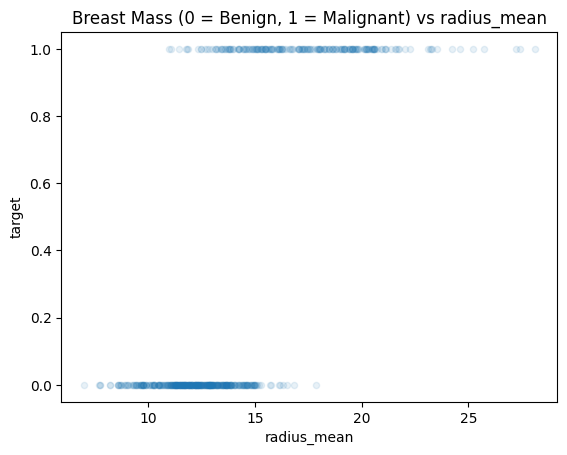

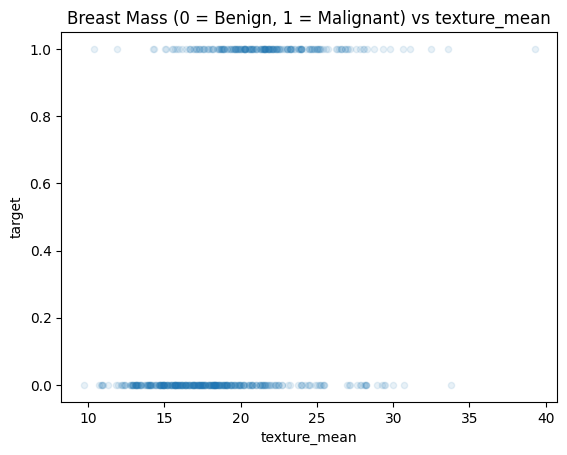

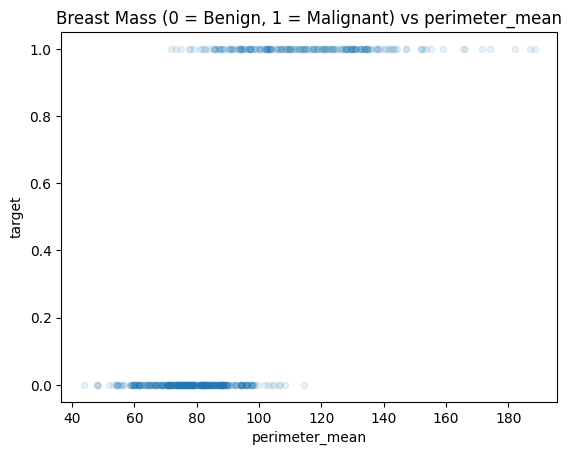

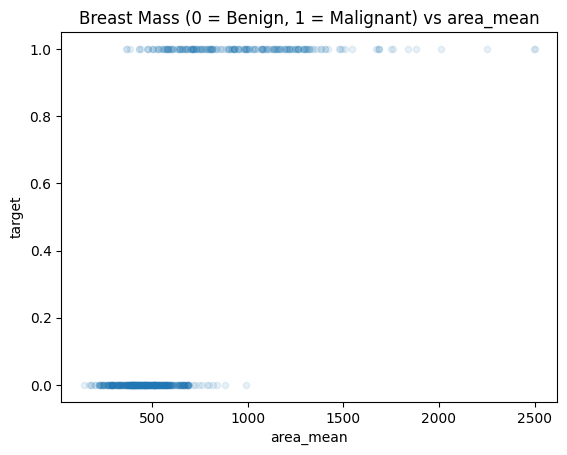

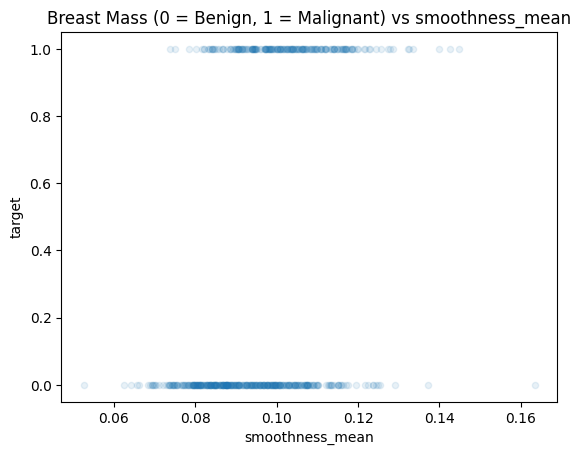

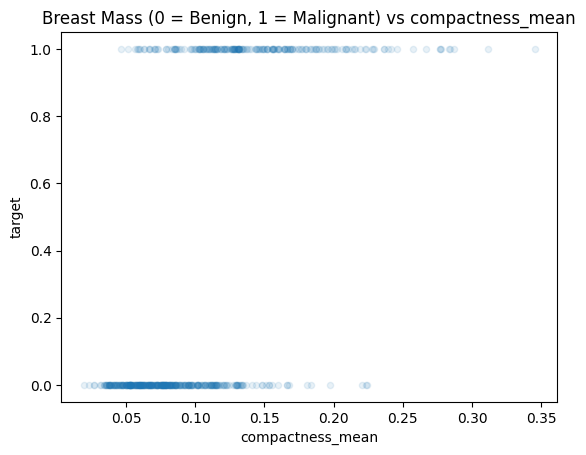

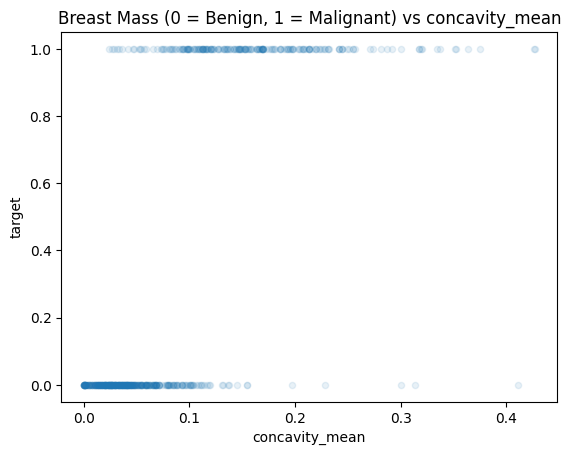

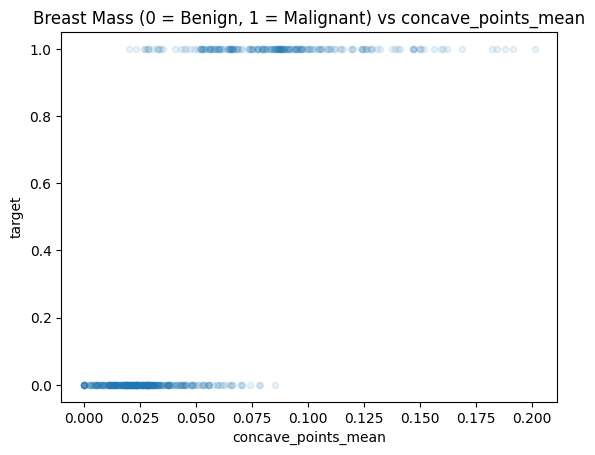

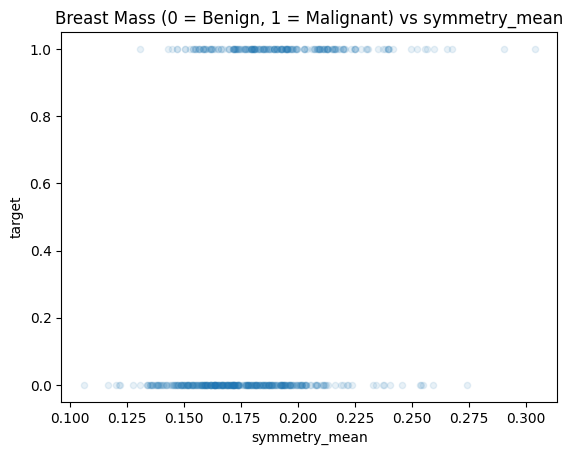

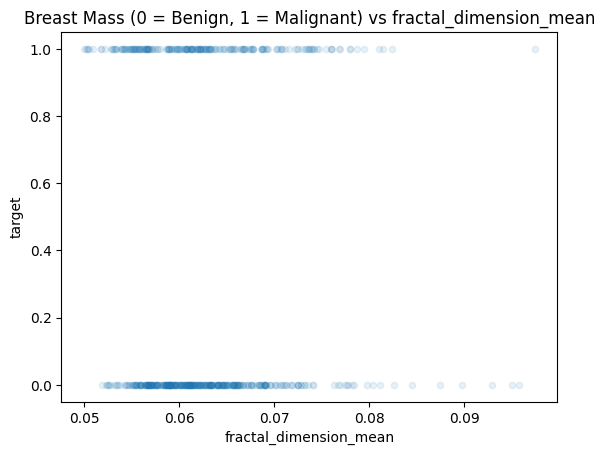

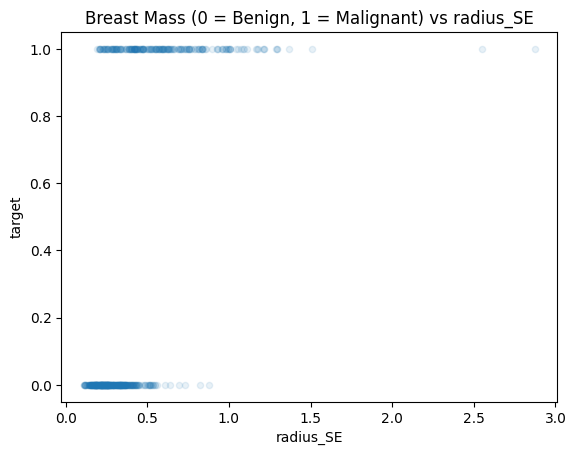

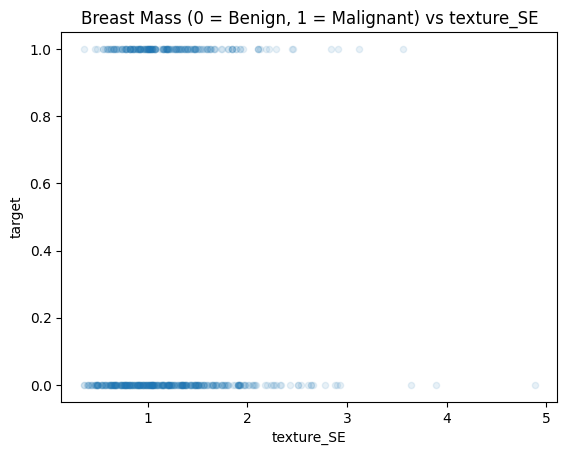

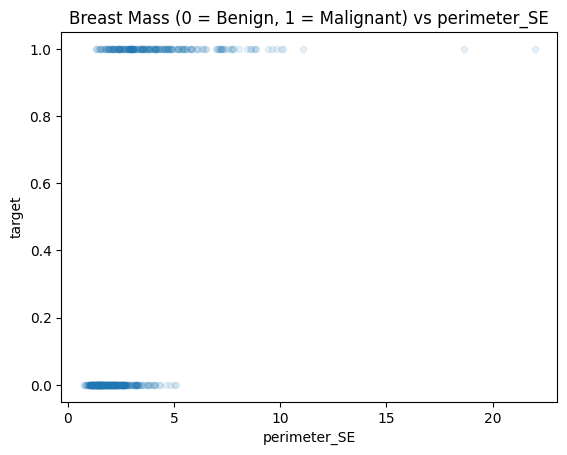

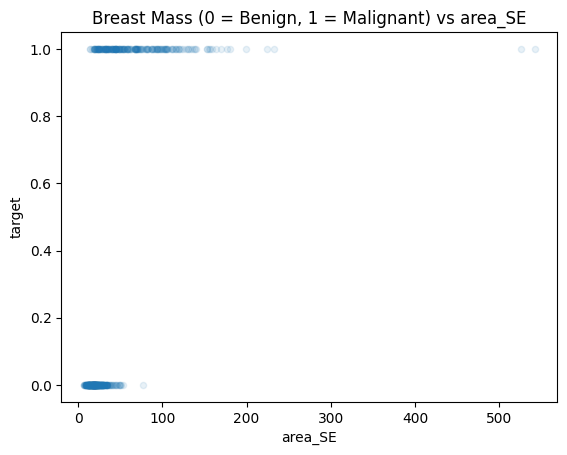

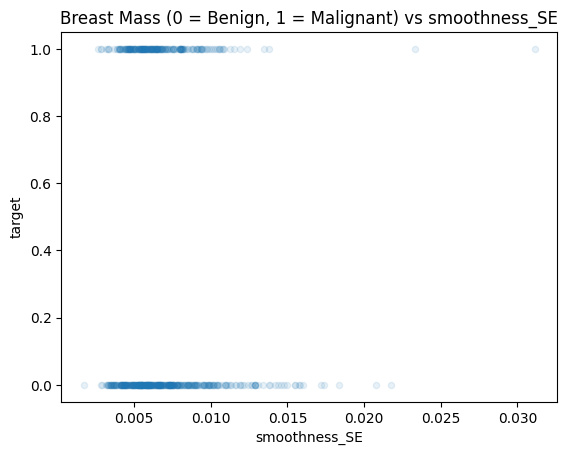

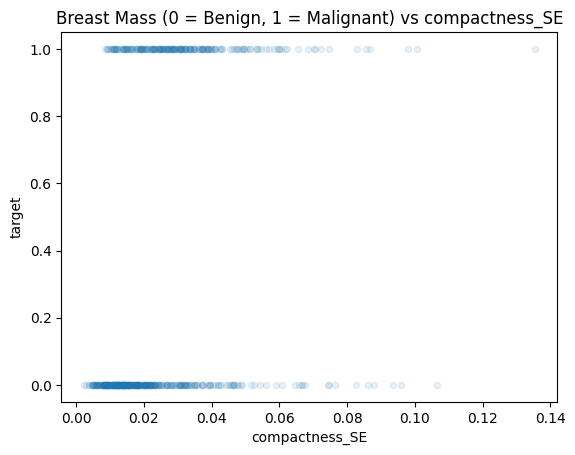

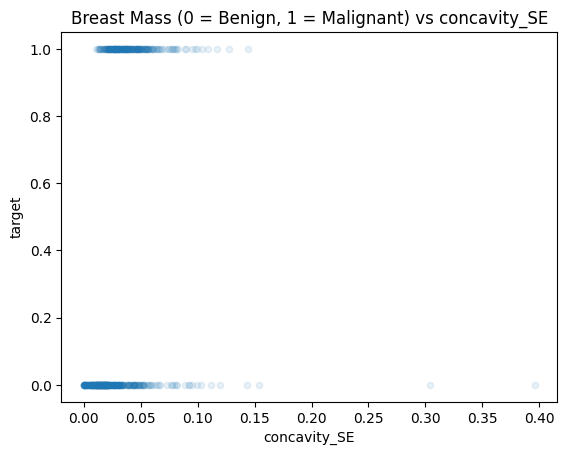

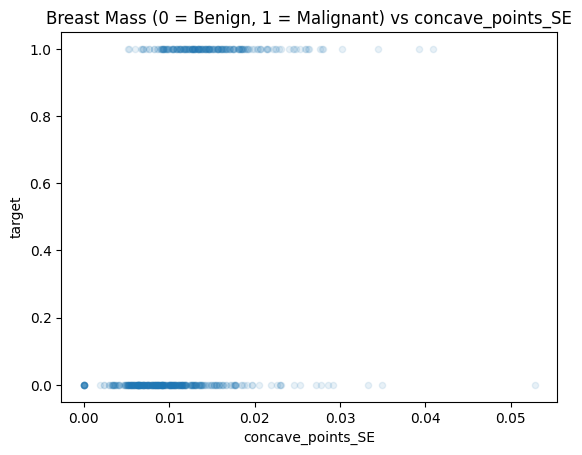

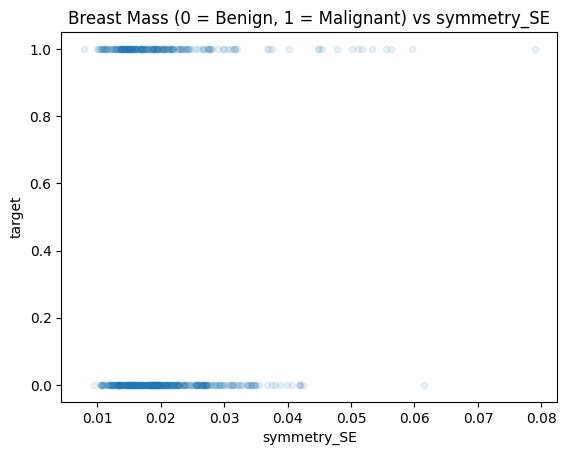

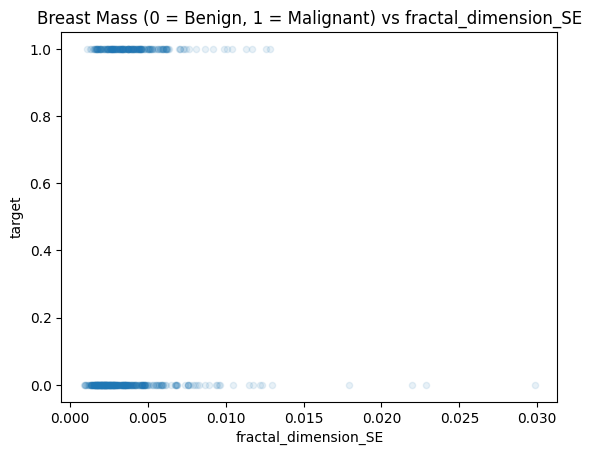

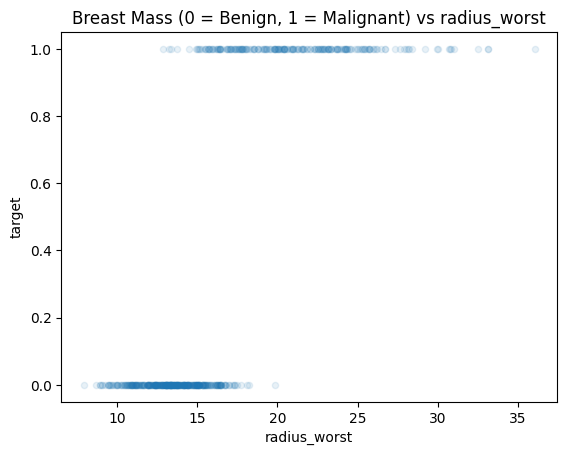

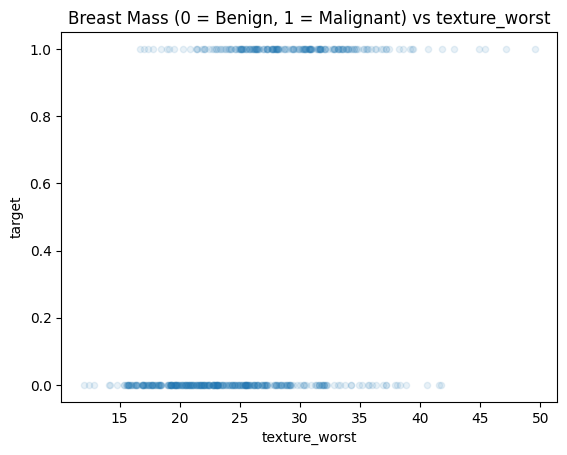

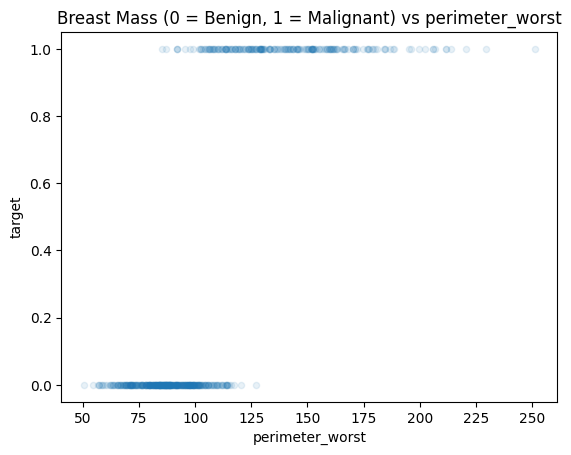

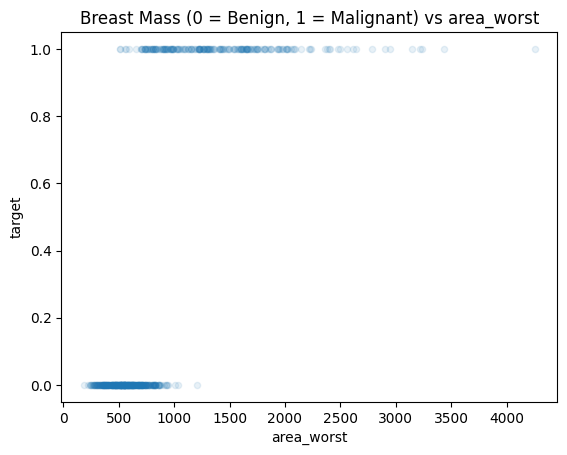

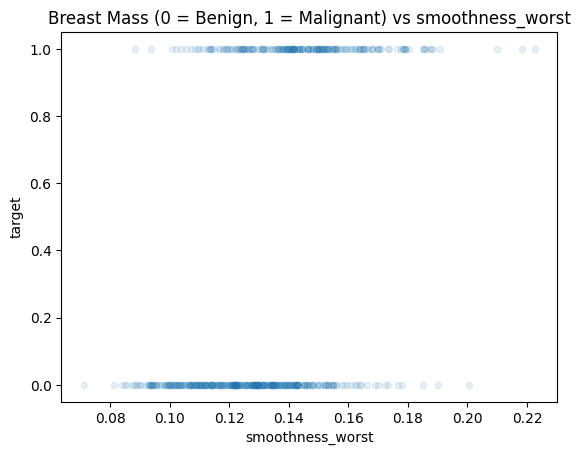

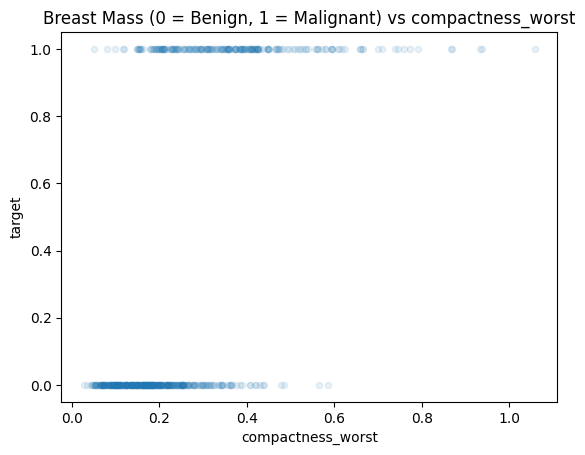

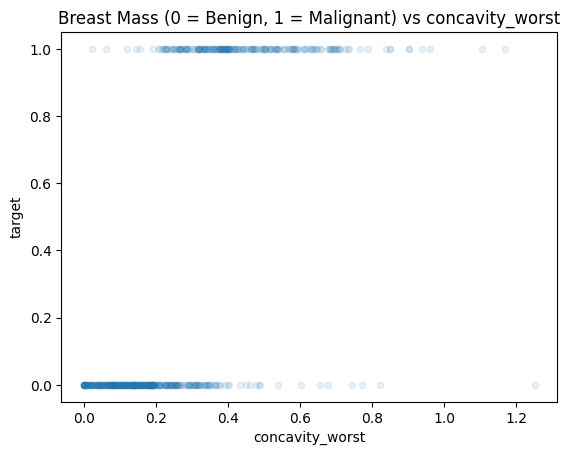

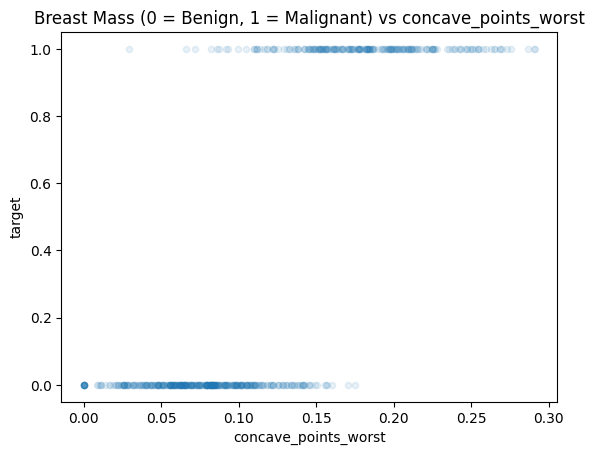

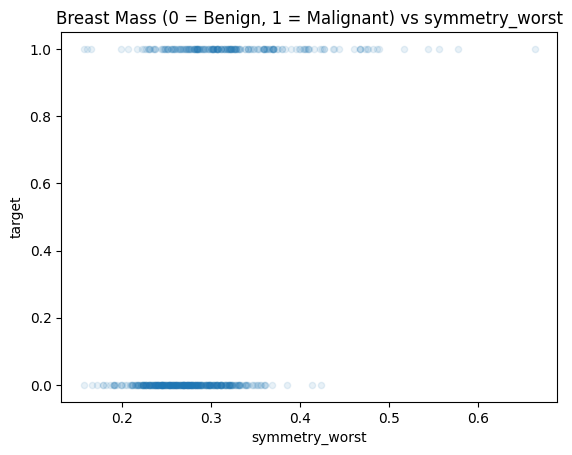

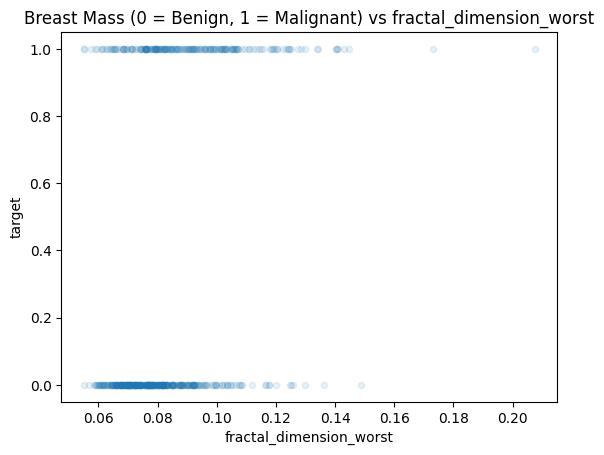

In [7]:
for c in breastCancer.columns:
    if c == 'target':
        continue

    breastCancer.plot.scatter(c, "target", alpha=0.1)
    plt.xlabel(c)
    plt.ylabel('target')
    plt.title(f"Breast Mass (0 = Benign, 1 = Malignant) vs {c}")
    None


`Breast Mass vs radius_mean`: **Mostly dependent** because the lower radius_mean values are mostly distributed along the 0 target (benign mass) with a slight overlap along the 1 target (malignant mass). You can be mostly confident that if the radius mean is higher than 15 that the mass is malignant because the radius mean values for 0 mostly cut off after 15.

`Breast Mass vs texture_mean`: **Independent** because there is a clear overlap of the texture values between benign and malignant masses. There is no clear distinction between the two target values and the texture_mean value.

`Breast Mass vs perimeter_mean`: **Mostly dependent** because the lower perimeter_mean values are mostly distributed to the 0 target (benign mass). There is a slight overlap of values between 80 and 100 with the target values which is why it is not a fully dependent variable. There is a clear cutoff at around 100 where you can be confident that the breast mass is malignant.

`Breast Mass vs area_mean`: **Somewhat dependent** because there is a significant amount of overlap in benign and malignant masses with an area_mean around 500-650 but then the larger values are majority malignant samples.

`Breast Mass vs smoothness_mean`: **Independent** because there is a clear overlap of the smoothness_mean values with benign and malignant samples. There is no clear distinction between the two target values to consider this variable dependent.

`Breast Mass vs compactness_mean`: **Somewhat dependent** because there is overlap in the lower compactness_mean values but after 0.15 you can be more confident that the mass is malignant. It is only somewhat dependent because the majority of samples overlap around 0.10.

`Breast Mass vs concavity_mean`: **Mostly dependent** because the majority of the concavity_mean values for benign masses are distributed from 0 to 0.1 while the majority of the malignant mass samples are distributed larger than 0.1. There is some overlap which is why the variable is not fully dependent.

`Breast Mass vs concave_points_mean`: **Mostly dependent** because the majority of benign samples have concave_points_mean values of 0 to 0.05 while malignant samples are distributed mostly larger than 0.05. There is still an overlap of values between 0.025 and 0.075 where there are both benign and malignant masses, so you cannot be fully confident in the distinction between the targets which is why it is mostly dependent instead of fully dependent.

`Breast Mass vs symmetry_mean`: **Independent** because there is no significant cutoff in symmetry_mean values between the benign and malignant masses. The majority of both targets are distributed similarly.

`Breast Mass vs fractal_dimension_mean`: **Independent** because the two targets are distributed similarly for the fractal_dimension_mean values. There is no clear cutoff of a significant amount of samples where there is a distinction between benign and malignant masses.

`Breast Mass vs radius_SE`: The majority of samples share a similar range in radius_SE values at around 0.1 to 0.5. There is some dependence within this variable though, but not enough to be very confident. If the value is larger than 0.5 you can be mostly confident that the mass is malignant, but if the value is below 0.5 you cannot make much of a distinction between benign or malignant masses. Therefore the variable is **partially dependent**.

`Breast Mass vs texture_SE`: **Independent** because you cannot make a distinction between the two masses in terms of texture_SE values since the majority of both target samples overlap between 1 and 2.

`Breast Mass vs perimeter_SE`: **Partially dependent** because the majority of both benign and malignant samples overlap from 1 to 5 perimeter_SE, but larger than 5 you can be confident that the sample is malignant.

`Breast Mass vs area_SE`: **Partially dependent** because there is a clear overlap in area_SE values for benign and malignant mass samples from 10 to 50, but you can be mostly confident that if the value is higher than 50 that it is most likely a malignant mass sample.

`Breast Mass vs smoothness_SE`: **Independent** because the benign and malignant samples are both mostly distributed between 0.003 and 0.0125 smoothness_SE. There are a few samples above 0.015 for benign samples, but it is not enough of the sample size for the variable to be considered dependent.

`Breast Mass vs compactness_SE`: **Independent** because there is no clear distinction between benign and malignant masses. Both targets have a similar compactness_SE value distribution with the majority being 0.01 to 0.04.

`Breast Mass vs concavity_SE`: **Independent** because the majority of benign and malignant samples are distributed between 0 and 0.05 concavity_SE. While you could argue that it is slightly dependent due to the fact that there are no malignant mass samples below 0.0167 concavity_SE which means you can have a high confidence in the mass being benign, the majority of all samples still overlap in the value ranges.

`Breast Mass vs concave_points_SE`: **Partially dependent** because the majority of benign and malignant mass samples are distributed between 0.01 and 0.02 concave_points_SE, but there is still a significant amount of samples below 0.01 where you can be somewhat confident that the mass is benign since the significant distribution cutoff for malignant is 0.01-0.02.

`Breast Mass vs symmetry_SE`: **Independent** because there is no clear distinction between the symmetry_SE values for benign and malignant samples. The majority of samples are distributed from 0.01 to 0.03 for both targets.

`Breast Mass vs fractal_dimension_SE`: **Independent** because the significant majority of benign and malignant samples overlap between 0.001 and 0.007. There is no clear cutoff in one of the targets to conclude that the variable has partial dependence.

`Breast Mass vs radius_worst`: **Mostly dependent** because the benign mass samples have radius_worst values from 8 to 17 while the malignant mass samples are distributed mostly around 16 to 25. There is some overlap in the lower range for malignant mass samples with the benign mass samples so it is not fully dependent.

`Breast Mass vs texture_worst`: **Somewhat dependent** because the benign mass samples are mostly distributed between 15 and 32 texture_worst while the malignant mass samples are mostly distributed between 22 and 35 texture_worst. Because of the significant overlap, it is difficult to distinish between the targets for a large range, however you can be somewhat confident that the mass is benign if the texture_worst is lower than 22 since there is a significant amount of benign samples from 15 to 22 while there are little samples in the same range for malignant mass samples.

`Breast Mass vs perimeter_worst`: **Mostly dependent** because the benign mass samples are heavily concentrated between 55 and 120 perimeter_worst while the malignant samples are mostly distributed from 120 to 170. There is a slight overlap around 120, but there is a clear cutoff for benign samples at 125 so you can be mostly confident that above 125 perimeter_worst the mass is likely malignant.

`Breast Mass vs area_worst`: **Mostly dependent** because the benign samples are mostly concentrated between 250 and 1000 area_worst while the malignant mass samples are mostly distributed between 750 to 2250 area_worst. There is some overlap in the lower range of malignant mass samples with the higher range of benign mass samples, so it is not a fully dependent variable.

`Breast Mass vs smoothness_worst`: **Independent** because there is not a clear cutoff in smoothness_worst values for benign and malignant mass samples. Both targets share a very similar spread of smoothness_worst values.

`Breast Mass vs compactness_worst`: **Somewhat dependent** because the kajority of compactness_worst values for benign masses is between 0.05 and 0.4 while the malignant samples is mostly distributed between 0.2 and 0.6. Since there is an overlap for the target samples in the lower compactness_worst values, it is not fully dependent but there is a clear cutoff after around 0.4 where more samples are malignant.

`Breast Mass vs concavity_worst`: **Somewhat dependent** because the benign mass samples are mostly distributed between the concavity_worst values of 0 to 0.4 while the malignant mass samples are mostly distributed between 0.2 to 0.7. There is a significant overlap for the targets between 0.2 to 0.4 concavity_worst. But, 0.4 is mostly a cutoff for the benign samples since there are not many above it while there are a significant amount of malignant samples above 0.4.

`Breast Mass vs concave_points_worst`: **Mostly dependent** because the concave_points_worst values for benign mass samples are mostly distributed between 0 and 0.15 and the malignant mass samples are mostly concentrated between 0.14 to 0.225. Benign mass samples have a sharp cutoff at around 0.15 so you can be more confident that above 0.15 it is most likely malignant.

`Breast Mass vs symmetry_worst`: **Independent** because the majority of benign and malignant samples share a similar range of 0.2 to 0.4 symmetry_worst. There is not a significant cutoff between the two targets with a signficant amount of samples to justify at least partial dependence.

`Breast Mass vs fractal_dimension_worst`: **Independent** because both the benign and malignant mass samples share a similar fractal_dimension_worst distribution where the majority of samples are between 0.06 and 0.12.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [8]:
from sklearn.metrics import mean_squared_error

X = breastCancer.drop(columns=['target'], axis='columns')
y = breastCancer['target']

# Ordinary Least Squares Regression model (aka Linear Regression)
model = sklearn.linear_model.LinearRegression() 
model.fit(X, y)

y_predictions = model.predict(X)

mse = mean_squared_error(y, y_predictions)
print(f"Mean Squared Error over the whole data set is {mse}")

Mean Squared Error over the whole data set is 0.0527550044305191


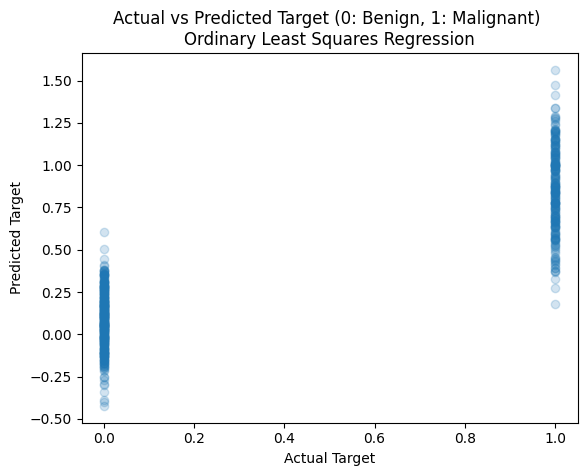

In [9]:
plt.scatter(y, y_predictions, alpha=0.2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Target (0: Benign, 1: Malignant) \nOrdinary Least Squares Regression')
None

The mean squared error over the whole data set is 0.0527550044305191

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Best linear model (lowest MSE): concave_points_worst (MSE = 0.08655)


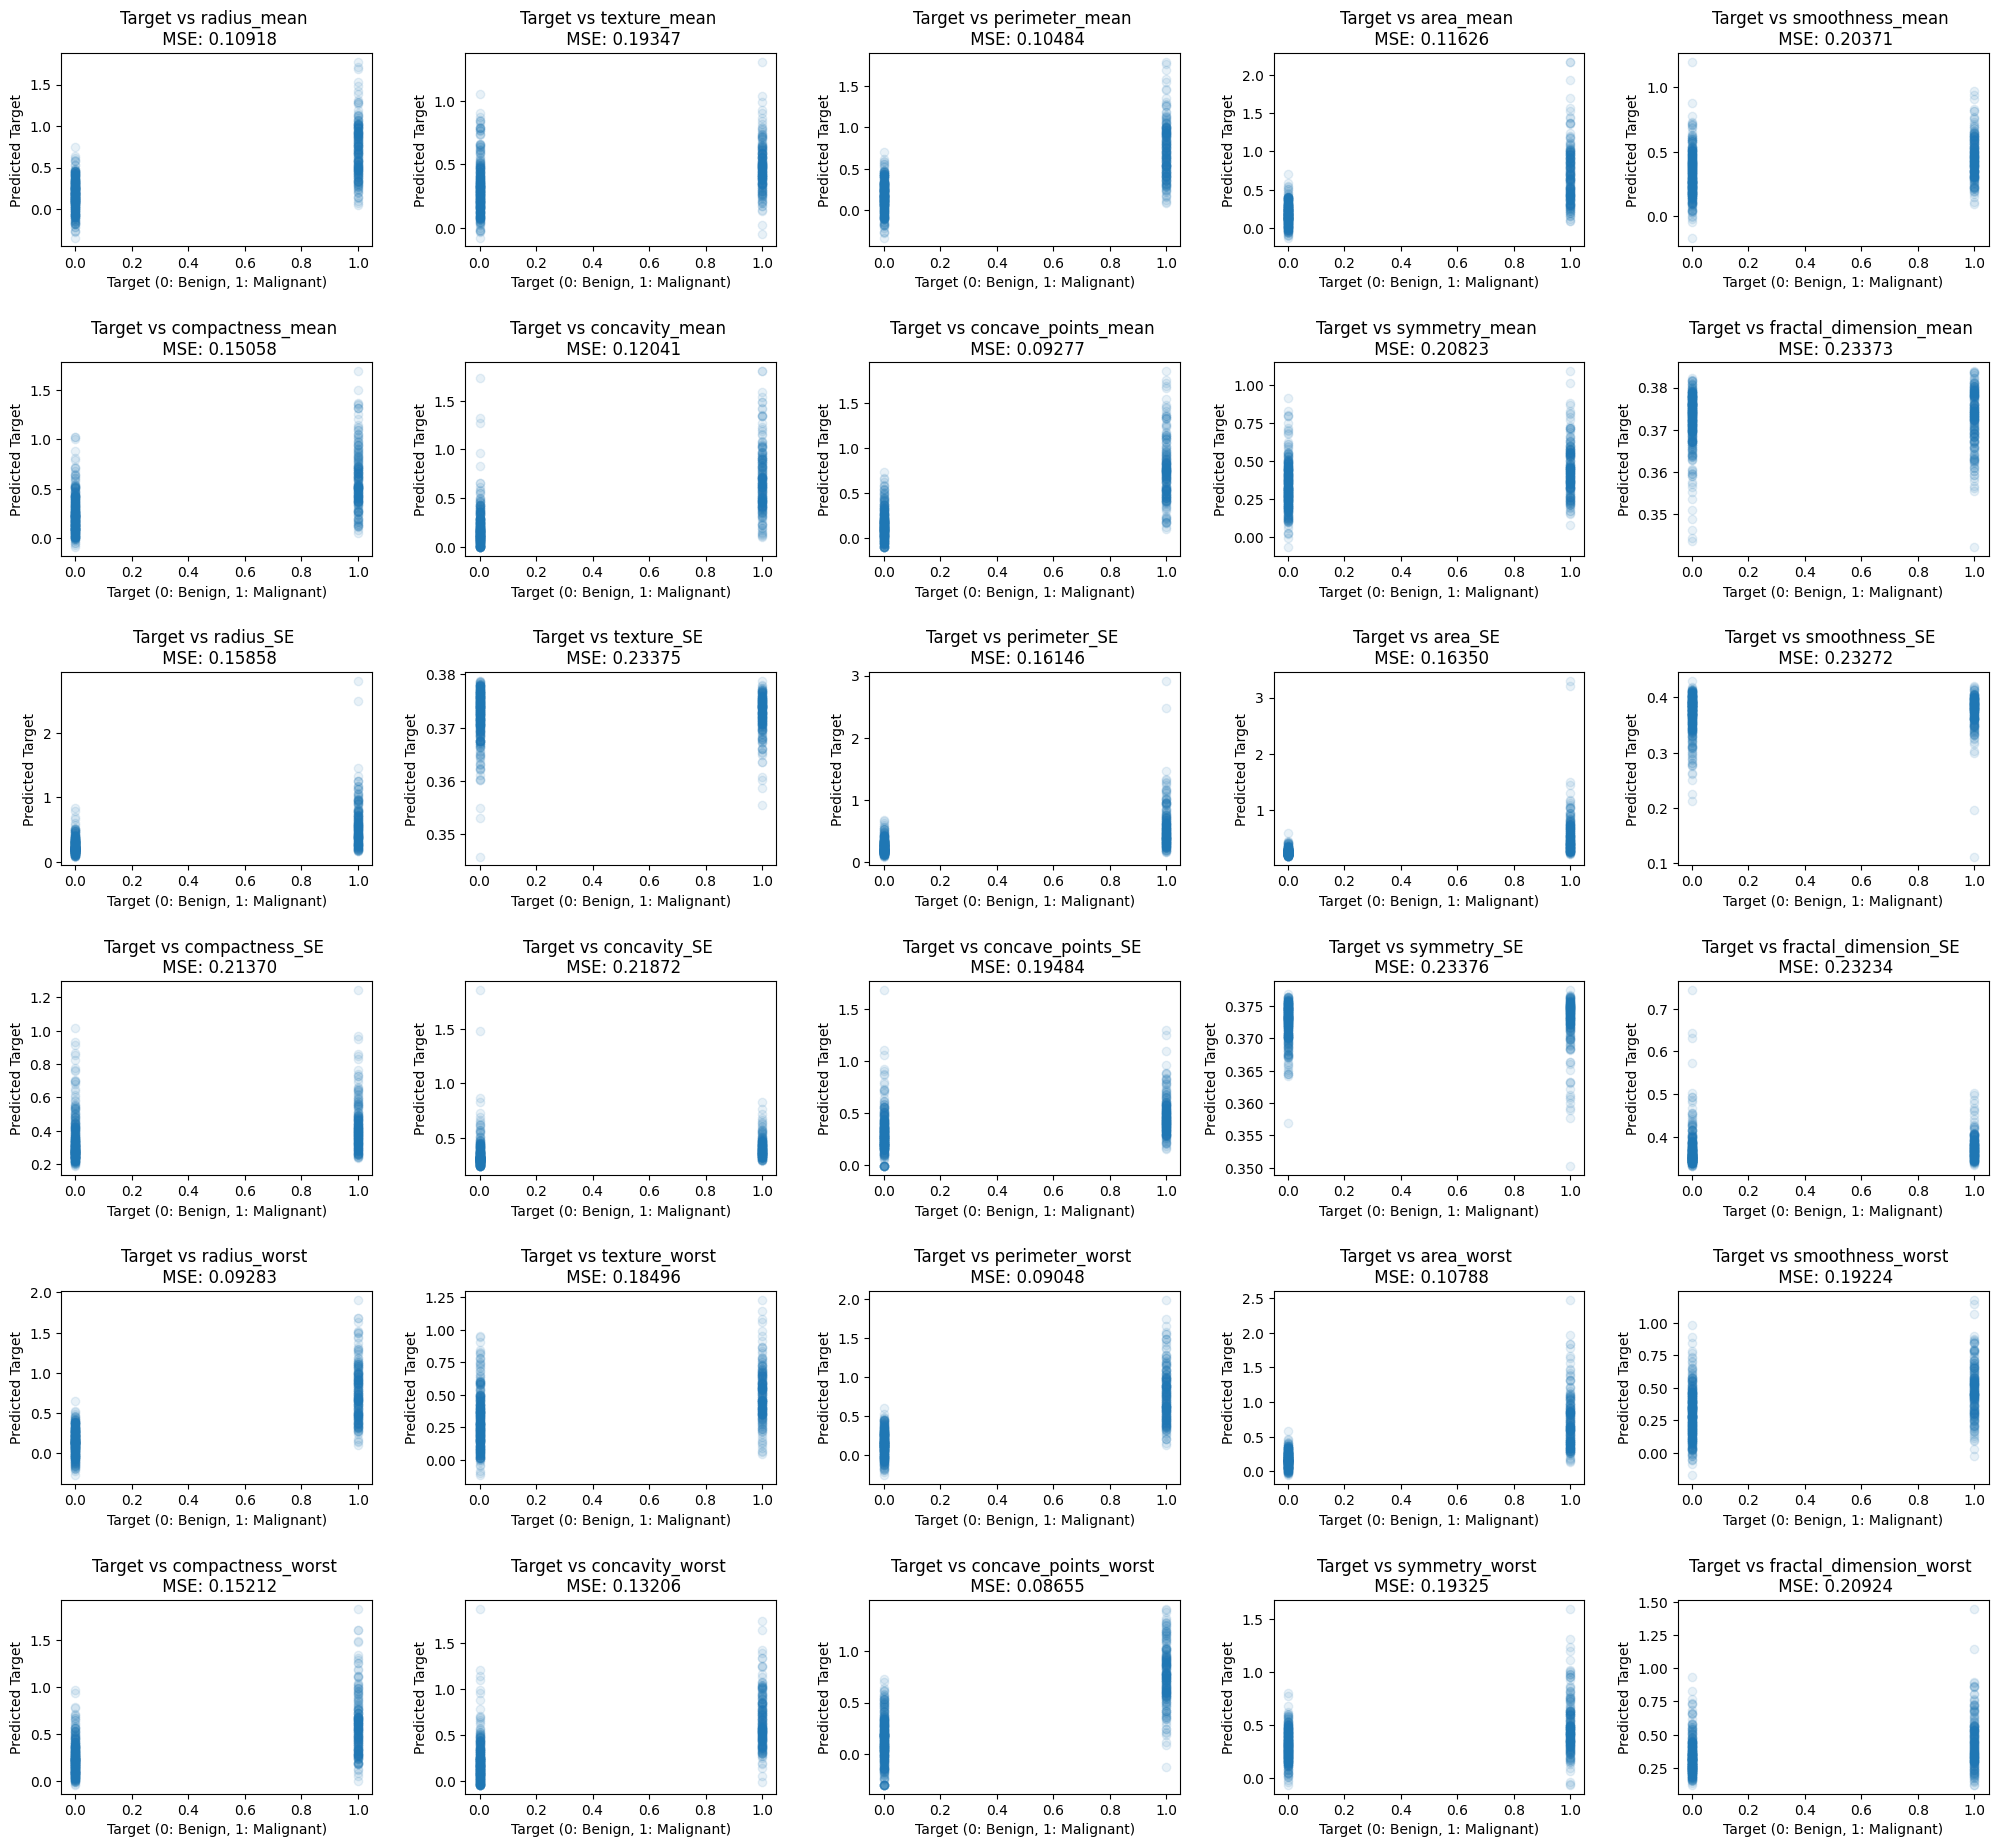

In [10]:
columns = breastCancer.drop(['target'], axis='columns').columns

NROWS = 6
NCOLS = 5

# Create figure for the subplots
fig, axs = plt.subplots(NROWS, NCOLS, figsize=(20, 18), sharex=False, sharey=False)

# automatic spacing to eliminate overlapping
plt.tight_layout() 
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# MSE for each input column
mse_results = {}

# Plot Target vs each feature
for i, c in enumerate(columns):
    # Flatten to iterate over all subplots without nested loops
    ax = axs.flatten()

    bc_input = pd.DataFrame(breastCancer[c])
    bc_target = breastCancer['target']

    model = sklearn.linear_model.LinearRegression()
    model.fit(bc_input, bc_target)

    bc_predictions = model.predict(bc_input)

    # Calculate MSE and add to mse_df
    mse = mean_squared_error(bc_target, bc_predictions)
    mse_results[c] = mse

    ax[i].scatter(bc_target, bc_predictions, alpha=0.1)
    ax[i].set_title(f"Target vs {c} \n MSE: {mse:.5f}")
    ax[i].set_xlabel(f"Target (0: Benign, 1: Malignant)")
    ax[i].set_ylabel('Predicted Target')

# Store MSE in DataFrame to see which input column has the best linear model of the target
mse_df = pd.DataFrame(data=mse_results.values(), index=mse_results.keys(), columns=['MSE'])

# Find best linear model
lowest_mse_feature = mse_df['MSE'].idxmin()
lowest_mse_value = mse_df['MSE'].min()

print(f"Best linear model (lowest MSE): {lowest_mse_feature} (MSE = {lowest_mse_value:.5f})")

##### Best linear model: `Target vs concave_points_worst`

Based on creating models for each individual feature of the data set versus the target feature, the target vs concave_points_worst is the best linear model because it had the lowest mean squared error out of all the models. A low MSE value means that the difference between the predicted target and the actual target is small (the lower the MSE value, the better fit).

##### `Target vs concave_points_worst` compared to `Target vs all features`

Building a linear regression (ordinary least squares) model based on all the features had a better fit than the linear regression model based on the concave_points_worst column. Both had low MSE, but the model based on all the features had a roughly 0.034 lower MSE.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

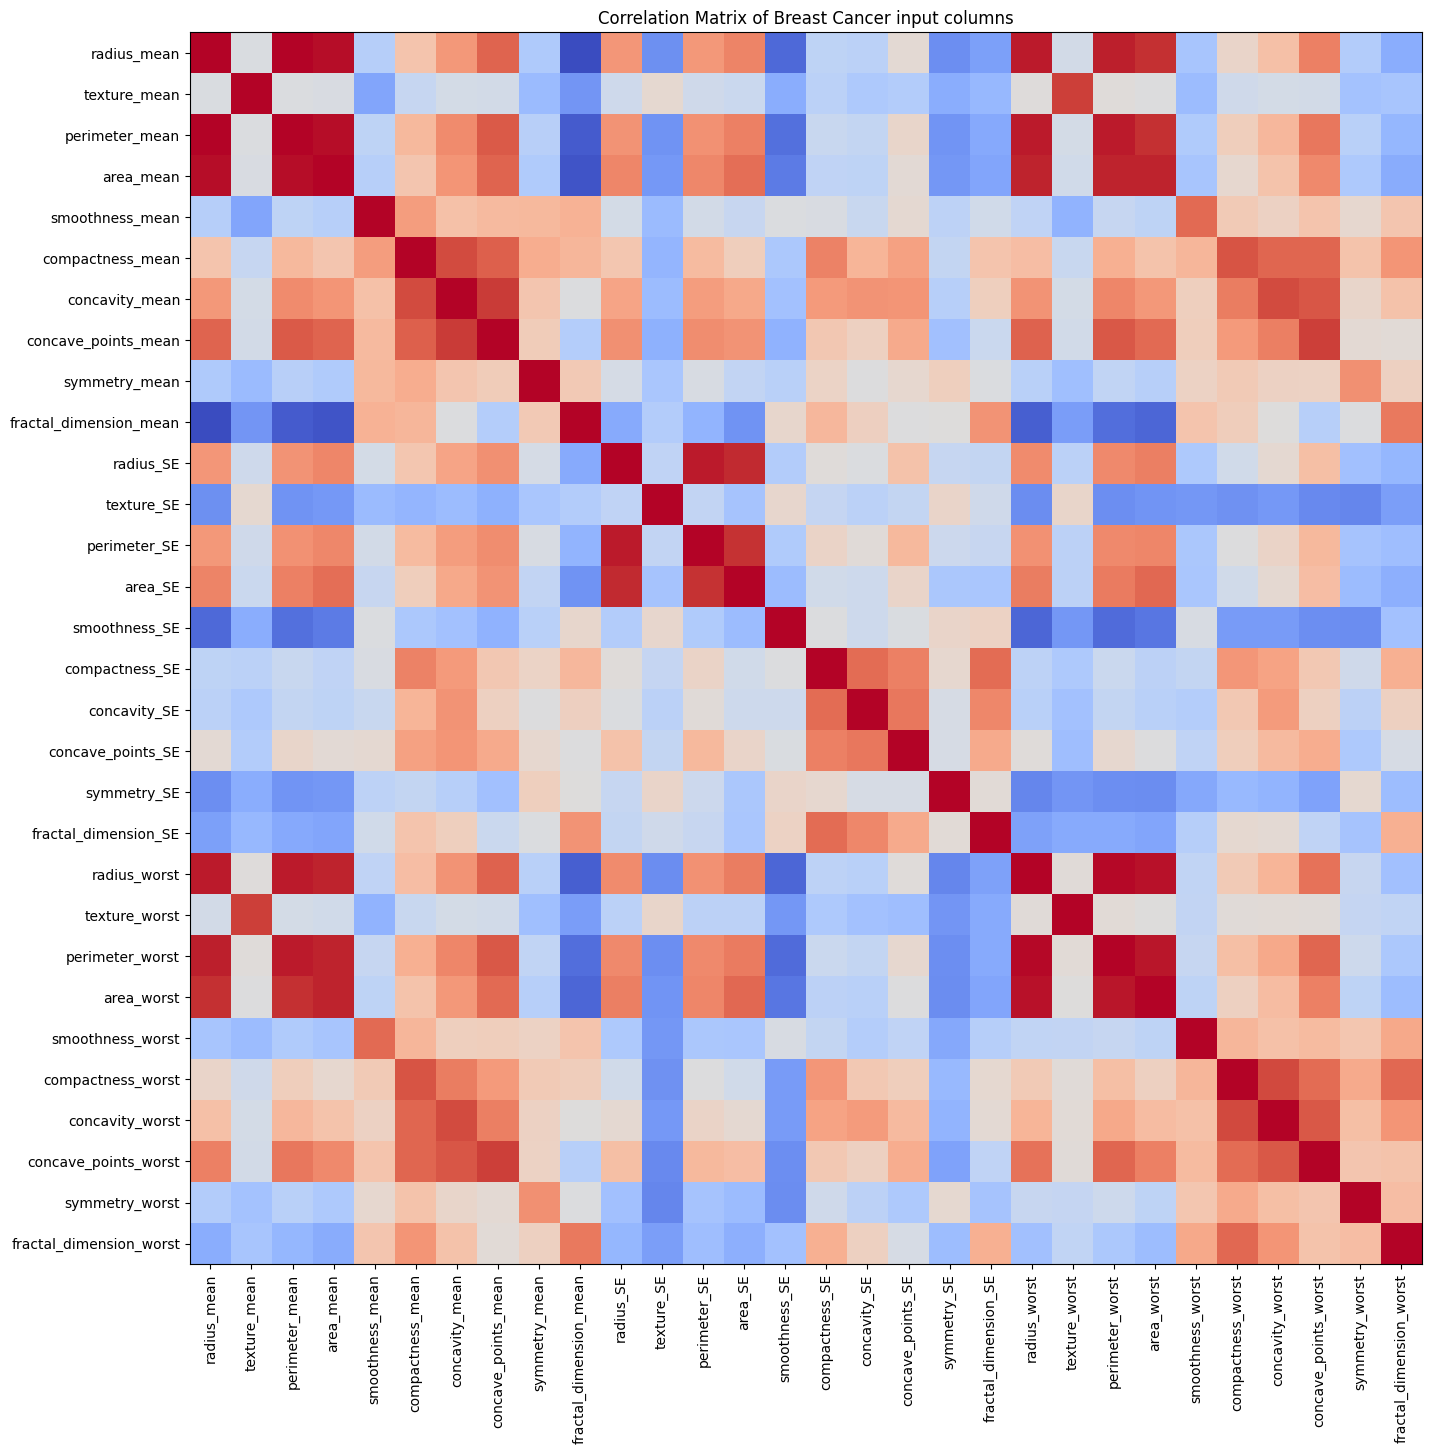

In [11]:
# Calculate correlations between input columns
breastCancer_inputs = breastCancer.drop(['target'], axis='columns')
correlations = breastCancer_inputs.corr()

num_inputs = len(correlations.columns)
plt.figure(figsize=(18,16))
plt.imshow(correlations, cmap='coolwarm')
plt.xticks(ticks= range(num_inputs), labels= correlations.columns, rotation=90)
plt.yticks(ticks= range(num_inputs), labels= correlations.columns)
plt.title("Correlation Matrix of Breast Cancer input columns")
None

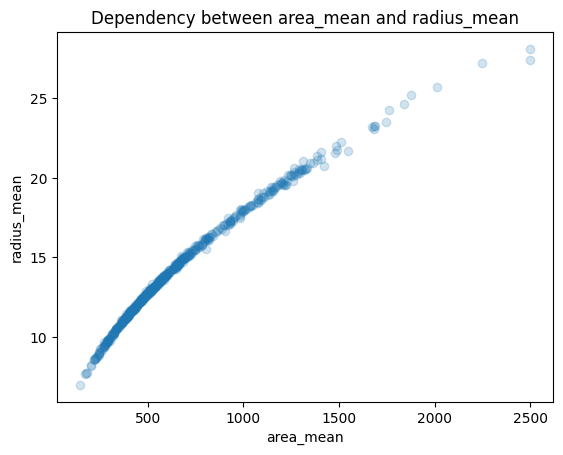

In [12]:
# Visualizing dependency between area_mean and radius_mean
plt.scatter(breastCancer['area_mean'], breastCancer['radius_mean'], alpha=0.2)
plt.xlabel("area_mean")
plt.ylabel("radius_mean")
plt.title("Dependency between area_mean and radius_mean")
None

In [13]:
# Splitting Threshold
t = 750

# Split Data where area_mean < 750
subsetA_breastCancer = breastCancer[breastCancer['area_mean'] < t]

# Split Data where area_mean >= 750
subsetB_breastCancer = breastCancer[breastCancer['area_mean'] >= t]

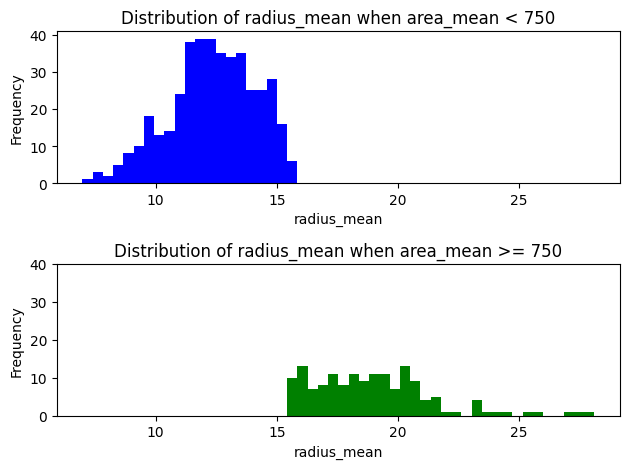

In [14]:
y_min = min(subsetA_breastCancer['radius_mean'].min(), subsetB_breastCancer['radius_mean'].min())
y_max = max(subsetA_breastCancer['radius_mean'].max(), subsetB_breastCancer['radius_mean'].max())
y_range = (y_min, y_max)
n_bins = 50

# Subset A Data where area_mean < 750
plt.subplot(2, 1, 1)
plt.hist(subsetA_breastCancer['radius_mean'], bins= n_bins, range= y_range, color= 'blue')
plt.title(f"Distribution of radius_mean when area_mean < {t}")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")

# Subset B Data where area_mean >= 750
plt.subplot(2, 1, 2)
plt.hist(subsetB_breastCancer['radius_mean'], bins= n_bins, range= y_range, color= 'green')
plt.ylim(0, 40) # matched first subplot's y scale for easier comparison
plt.title(f"Distribution of radius_mean when area_mean >= {t}")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")

plt.tight_layout()
None

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [15]:
breastCancer_pca_columns = breastCancer.drop(['target'], axis='columns').columns

# Normalize Data
breastCancer_normalized = breastCancer[breastCancer_pca_columns] / breastCancer[breastCancer_pca_columns].std()

breastCancer_pca = PCA()
breastCancer_pca.fit(breastCancer_normalized[breastCancer_pca_columns])
breastCancer_components = pd.DataFrame(breastCancer_pca.components_, columns= breastCancer_pca_columns)
breastCancer_components

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,-0.041409,0.603050,-0.041983,-0.053434,-0.159383,-0.031795,-0.019123,-0.065336,-0.067125,-0.048587,...,-0.015417,0.632808,-0.013803,-0.025895,-0.017652,0.091328,0.073951,-0.006007,0.036251,0.077053
4,-0.037786,0.049469,-0.037375,-0.010331,0.365089,-0.011704,-0.086375,0.043861,0.305941,0.044424,...,0.004407,0.092883,-0.007454,0.027391,0.324435,-0.121804,-0.188519,-0.043332,0.244559,-0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


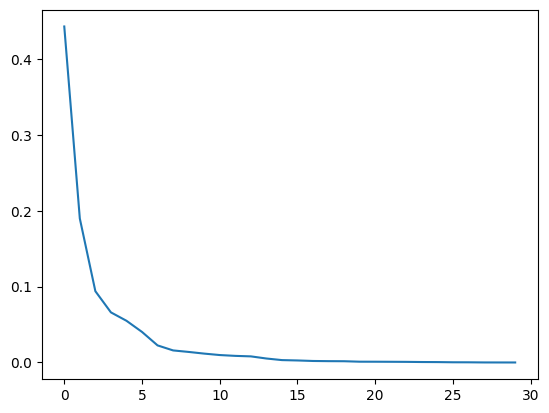

In [16]:
plt.plot(breastCancer_pca.explained_variance_ratio_)
None

In [17]:
# Compute how much of the data variation is explained by the first half of the principal components

explained_variance = breastCancer_pca.explained_variance_ratio_
n_features = len(explained_variance)
first_half_components = n_features // 2

cumulative_var_first_half = np.sum(explained_variance[:first_half_components])

print(f"Number of components: {n_features}")
print(f"Number of components in the first half: {first_half_components}")
print(f"Cumulative variance explained in the first half: {cumulative_var_first_half}")

Number of components: 30
Number of components in the first half: 15
Cumulative variance explained in the first half: 0.9864881227145474


##### Roughly 98.65% of the data variation is explained in the first half of the principal components.

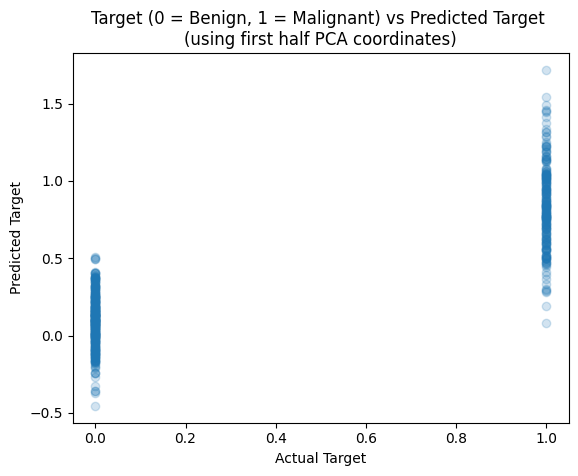

In [18]:
# Build a linear regression using coordinates computed from the first half of the principal components.

X_pca = breastCancer_pca.transform(breastCancer_normalized)
X_first_half = X_pca[:, :first_half_components]
y_target = breastCancer['target']

linear_model_pca = sklearn.linear_model.LinearRegression()
linear_model_pca.fit(X_first_half, y_target)

y_pred = linear_model_pca.predict(X_first_half)

plt.scatter(y_target, y_pred, alpha=0.2)
plt.title("Target (0 = Benign, 1 = Malignant) vs Predicted Target \n(using first half PCA coordinates)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
None

In [19]:
# Compare the mean squared error of this model to the previous model.

mse_pca = mean_squared_error(y_target, y_pred)
print(f"Mean Squared Error of Linear Regression Model using first half PCA coordinates: {mse_pca}")
print(f"Mean Squared Error of the previous model: {lowest_mse_value}")
print(f"MSE difference (this model vs previous): ", mse_pca - lowest_mse_value)

Mean Squared Error of Linear Regression Model using first half PCA coordinates: 0.059863710455230326
Mean Squared Error of the previous model: 0.08655219828445855
MSE difference (this model vs previous):  -0.026688487829228225


The linear regression model using the coordinates from the first half of the principal components has a significantly lower mean squared error than the previous model which was a linear regression model of concave_points_worst versus the target. The PCA linear regression model is a better model because it has a ~0.0267 lower mean squared error.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [37]:
corr = breastCancer_inputs.corr()

# fill 1.0 correlation as 0 since it compares the same columns
np.fill_diagonal(corr.values, 0)

maximum_corr = corr.max().max()

series_corr = corr.stack()
max_corr_pair = series_corr[series_corr == maximum_corr]

c1 = max_corr_pair.index[0][0]
c2 = max_corr_pair.index[0][1]
print(f"The pair of input columns with the highest correlation: {c1} and {c2} (correlation: {maximum_corr})")
print()

PC1 = breastCancer_components.iloc[0][['radius_mean', 'perimeter_mean']]
print('Principal Components 1')
print(PC1)

breastCancer_components

The pair of input columns with the highest correlation: radius_mean and perimeter_mean (correlation: 0.9978552814938109)

Principal Components 1
radius_mean       0.218902
perimeter_mean    0.227537
Name: 0, dtype: float64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,-0.041409,0.603050,-0.041983,-0.053434,-0.159383,-0.031795,-0.019123,-0.065336,-0.067125,-0.048587,...,-0.015417,0.632808,-0.013803,-0.025895,-0.017652,0.091328,0.073951,-0.006007,0.036251,0.077053
4,-0.037786,0.049469,-0.037375,-0.010331,0.365089,-0.011704,-0.086375,0.043861,0.305941,0.044424,...,0.004407,0.092883,-0.007454,0.027391,0.324435,-0.121804,-0.188519,-0.043332,0.244559,-0.094423
5,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
6,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
7,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
8,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
9,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


The extremely high correlation between `radius_mean` and `perimeter_mean` (nearly perfect correlation) means that in the principal components they will have high, similar weights on the first principal component.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [60]:
from scipy.stats import zscore

# check z score to find potential outliers
z = zscore(breastCancer_inputs)
breastCancer_zscore = pd.DataFrame(z, columns=breastCancer_inputs.columns)

# maximum z score to find the outlier of each column
breastCancer_zscore.max()

radius_mean                 3.971288
texture_mean                4.651889
perimeter_mean              3.976130
area_mean                   5.250529
smoothness_mean             4.770911
compactness_mean            4.568425
concavity_mean              4.243589
concave_points_mean         3.927930
symmetry_mean               4.484751
fractal_dimension_mean      4.910919
radius_SE                   8.906909
texture_SE                  6.655279
perimeter_SE                9.461986
area_SE                    11.041842
smoothness_SE               8.029999
compactness_SE              6.143482
concavity_SE               12.072680
concave_points_SE           6.649601
symmetry_SE                 7.071917
fractal_dimension_SE        9.851593
radius_worst                4.094189
texture_worst               3.885905
perimeter_worst             4.287337
area_worst                  5.930172
smoothness_worst            3.955374
compactness_worst           5.112877
concavity_worst             4.700669
c

concavity_SE stands out because its largest z-score is 12.07 standard deviations above the mean. area_SE could also be an interesting column to check out since its largest z-score is 11.04 standard deviations above the mean, but I decided on the largest z-score to find one of the most significant outlier row of the dataset based on the furthest point from the mean.

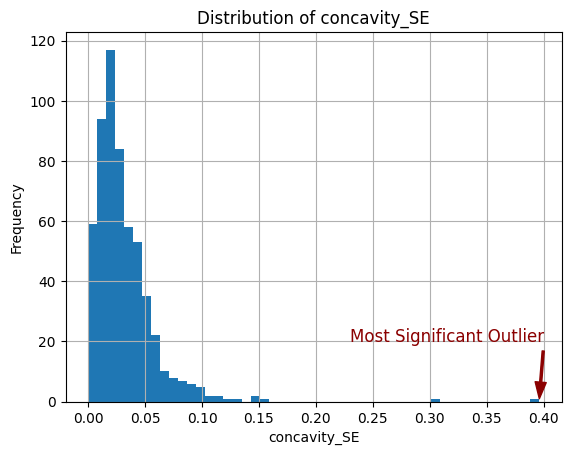

In [98]:
breastCancer['concavity_SE'].hist(bins=50)
plt.xlabel("concavity_SE")
plt.ylabel("Frequency")
plt.title("Distribution of concavity_SE")
plt.annotate(
    'Most Significant Outlier',
    xy=(breastCancer['concavity_SE'].max(), 0),
    xytext=(0.4, 20),
    arrowprops=dict(shrink=0.05, 
                    width=1.5, 
                    headwidth=8,
                    color='darkred'),
    fontsize=12,
    horizontalalignment='right',
    color='darkred'
)
None

In [75]:
outlier = breastCancer[breastCancer['concavity_SE'] > 0.35]
outlier

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
152,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


In [77]:
breastCancer_zscore['concavity_SE'].iloc[152]

np.float64(12.072680399588068)

After analyzing the maximum z-scores of each feature, I decided on looking at the largest maximum z-score which was for `concavity_SE`. Then, I created a histogram to see if there is a significant outlier compared to the majority of samples. The distribution of the majority of the samples was from 0 to 0.15 with two outliers (one at roughly 0.30 and the other slightly under 0.4). The most significant outlier of this feature is the row where the `concavity_SE` was ~12.07 standard deviations from the mean. This is significantly outside of the norm for the spread of most of the samples. Row 152 is highly unrepresentative of the rest of the dataset because of its unusually high `concavity_SE` z-score.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

[Subplotting Help](https://gemini.google.com/share/76f1aa708c2e)

[Arrow Annotations](https://gemini.google.com/share/bd7ab8131a30)